In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [ ]:
len(X) , len(y)

(1000, 1000)

In [ ]:
print(f"First five samples of X: {X[:5]}")
print(f"First five samples of y: {y[:5]}")

First five samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y: [1 1 1 1 0]


In [ ]:
# Make a dataframe of circle data

import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})

circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


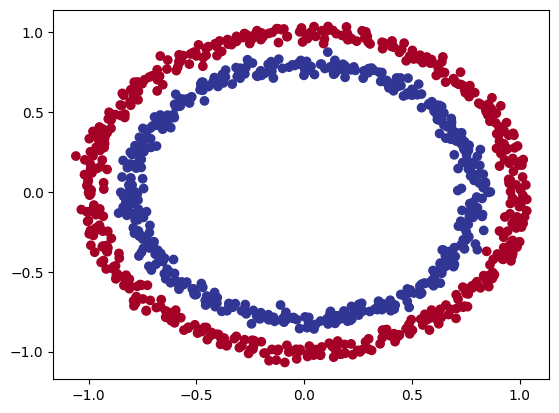

In [ ]:
# Visualize

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y = X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

If we want more small datasets to prectice search **toydatasetsklearn**

### 1.1 Check inout and out shape

In [ ]:
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} | Values for one sample of y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} | Shape for one sample of y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] | Values for one sample of y: 1
Shape for one sample of X: (2,) | Shape for one sample of y: ()


### 1.2 Turn data into tensors and create train and test split

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2,
                                                       random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 2. Building a model (with GPU)

In [ ]:
from torch import nn

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
# 2.1 Construct a model that subclasses nn.Module

class CirclemodelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.linear layer capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = CirclemodelV0().to(device)
model_0

CirclemodelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict(), model_1.state_dict()

(OrderedDict([('layer_1.weight',
               tensor([[ 0.4059, -0.4355],
                       [-0.3870, -0.5371],
                       [-0.6313,  0.2363],
                       [-0.3984, -0.5976],
                       [-0.2480,  0.1673]], device='cuda:0')),
              ('layer_1.bias',
               tensor([ 0.0361, -0.0134,  0.6129, -0.0416, -0.1398], device='cuda:0')),
              ('layer_2.weight',
               tensor([[-0.0068, -0.3615,  0.3498, -0.4023, -0.3556]], device='cuda:0')),
              ('layer_2.bias', tensor([0.2639], device='cuda:0'))]),
 OrderedDict([('0.weight',
               tensor([[-0.6286, -0.2748],
                       [ 0.6889,  0.4778],
                       [-0.4405,  0.6749],
                       [ 0.0862, -0.0726],
                       [-0.5627, -0.6876]], device='cuda:0')),
              ('0.bias',
               tensor([ 0.6092,  0.2606,  0.4733, -0.4171, -0.4123], device='cuda:0')),
              ('1.weight',
               tens

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)} , Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)} , Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: {untrained_preds[:10]}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200 , Shape: torch.Size([200, 1])
Length of test samples: 200 , Shape: torch.Size([200, 2])

First 10 predictions: tensor([[0.8021],
        [0.9942],
        [0.2886],
        [0.9476],
        [0.2731],
        [0.3905],
        [0.9438],
        [0.8024],
        [0.2900],
        [1.0069]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# Setup the loss_function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior input to BCELoss
# nn.Sequential(
#   nn.Sigmoid(),        =   BCEWithLogitsLoss
#   nn.BCELoss()
#)
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation built in

In [ ]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Claculate accuracy
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred))*100
  return acc

### 3. Train model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits.**

We can convert these **logits** into prediction probabilities by apssing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
# View first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.8021],
        [0.9942],
        [0.2886],
        [0.9476],
        [0.2731]], device='cuda:0')

In [ ]:
# use the sigmoid activation function on our model logits to turn them into predictionn probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6904],
        [0.7299],
        [0.5717],
        [0.7206],
        [0.5678]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs --> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# get rid of extra dimention
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

### 3.2 Building a training and test loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train , y_train = X_train.to(device), y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  ## trainig
  model_0.train

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turns logits -> pred probabilities -> pred labels

  # loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss ecpects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  ## Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc}% | Test loss: {test_loss} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.7376952171325684 | Acc: 50.0% | Test loss: 0.7538837790489197 | Test acc: 50.00%
Epoch: 10 | Loss: 0.7145898938179016 | Acc: 60.0% | Test loss: 0.7293058633804321 | Test acc: 56.50%
Epoch: 20 | Loss: 0.7049296498298645 | Acc: 53.625% | Test loss: 0.7180489301681519 | Test acc: 49.50%
Epoch: 30 | Loss: 0.7004261016845703 | Acc: 52.25% | Test loss: 0.7121292948722839 | Test acc: 47.50%
Epoch: 40 | Loss: 0.698074221611023 | Acc: 52.25% | Test loss: 0.7085720896720886 | Test acc: 48.50%
Epoch: 50 | Loss: 0.6966990232467651 | Acc: 51.87500000000001% | Test loss: 0.7061744332313538 | Test acc: 47.00%
Epoch: 60 | Loss: 0.6958104372024536 | Acc: 52.125% | Test loss: 0.7044128179550171 | Test acc: 46.50%
Epoch: 70 | Loss: 0.6951903104782104 | Acc: 52.125% | Test loss: 0.7030400037765503 | Test acc: 46.50%
Epoch: 80 | Loss: 0.6947334408760071 | Acc: 52.0% | Test loss: 0.7019288539886475 | Test acc: 45.00%
Epoch: 90 | Loss: 0.694384753704071 | Acc: 51.87500000000001% | Test los

### Model not learning well ;(

In [ ]:
import requests
from pathlib import Path

# Download helper functions from learn python repo (if it is not already downloaded)
if Path("helper_function.py").is_file():
  print("helper_function.py alredy exist, skipping download")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary


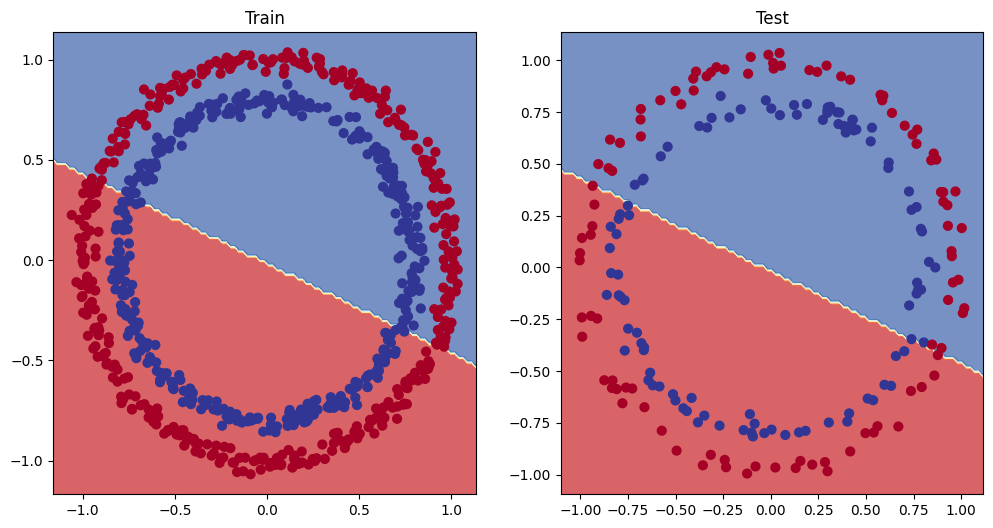

In [ ]:
# Plot decision boundary of our model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Improving a model (from a model prospective)

* Add more layers - give the model more chances to learn about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units.
* Fit for longer (epochs)
* Changing the activation function
* Changing the learning rate
* Changing the loss function

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=8)
    self.layer_2 = nn.Linear(in_features=8,out_features=8)
    self.layer_3 = nn.Linear(in_features=8,out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # faster computatuion when code in this format rather then step by step

model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
# Write a training and evalution loop for model_2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on the target device
X_train,y_train = X_train.to(device) , y_train.to(device)
X_test,y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):

  ### Training
  model_2.train()

  # 1. Forward pass
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Claculate the loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_2(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/acc
    test_loss =loss_fn(test_logits,
                  y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc}% | Test loss: {test_loss} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6986390352249146 | Acc: 47.625% | Test loss: 0.6937922239303589 | Test acc: 51.50%
Epoch: 10 | Loss: 0.6964757442474365 | Acc: 48.875% | Test loss: 0.6926801800727844 | Test acc: 51.50%
Epoch: 20 | Loss: 0.6955785751342773 | Acc: 49.375% | Test loss: 0.692444920539856 | Test acc: 51.00%
Epoch: 30 | Loss: 0.6950634121894836 | Acc: 49.75% | Test loss: 0.6924082040786743 | Test acc: 51.50%
Epoch: 40 | Loss: 0.6946998238563538 | Acc: 49.625% | Test loss: 0.6924221515655518 | Test acc: 50.50%
Epoch: 50 | Loss: 0.6944177746772766 | Acc: 50.375% | Test loss: 0.6924552917480469 | Test acc: 51.00%
Epoch: 60 | Loss: 0.6941902041435242 | Acc: 50.375% | Test loss: 0.6925005912780762 | Test acc: 50.50%
Epoch: 70 | Loss: 0.6940034031867981 | Acc: 50.5% | Test loss: 0.6925556659698486 | Test acc: 50.00%
Epoch: 80 | Loss: 0.6938484311103821 | Acc: 50.24999999999999% | Test loss: 0.6926185488700867 | Test acc: 50.00%
Epoch: 90 | Loss: 0.6937190294265747 | Acc: 50.0% | Test loss: 0.69

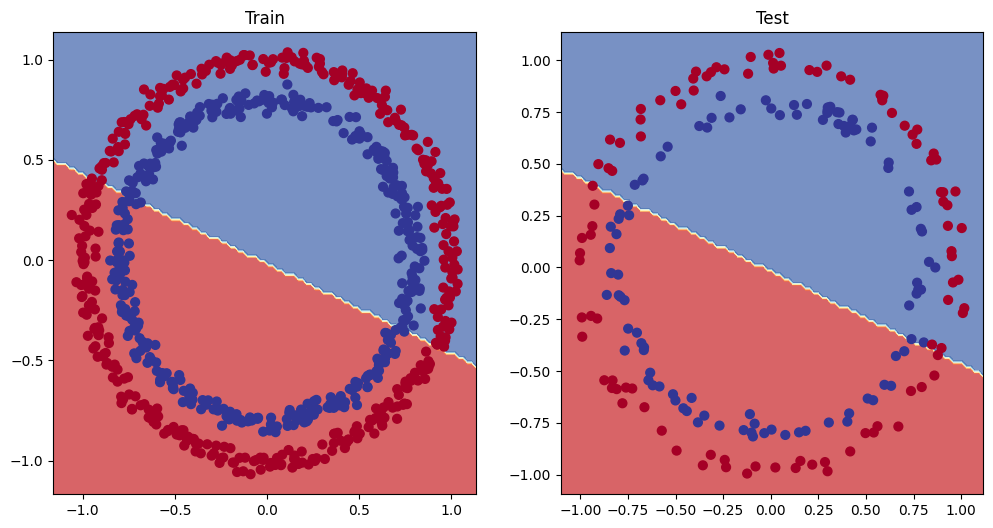

In [ ]:
# Plot decision boundary of our model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)

### The missing piece : NON LINEARITY

In [ ]:
import torch
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

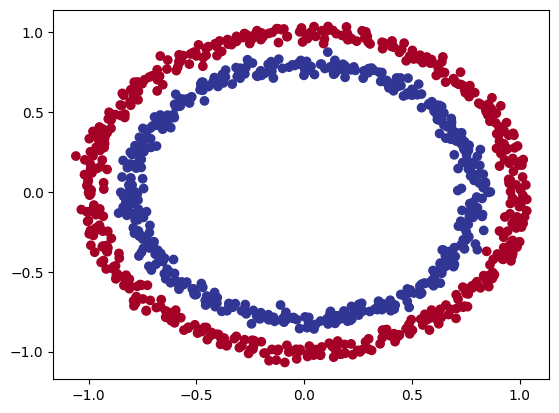

In [ ]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# Split into train and test data
X_train, X_test ,y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

### Building a model with non linearity

In [ ]:
# Building a model with non linear activation function
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=128)
    self.layer_2 = nn.Linear(in_features=128,out_features=256)
    self.layer_3 = nn.Linear(in_features=256,out_features=1)
    self.relu = nn.ReLU() # Non linear activation function

  def forward(self, x):
    # Where should we put our non linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
  

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1300

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  ### Testing
  model_3.eval()
  with torch.inference_mode():

    # Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)

  ### print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6966 | Acc: 37.62% | Test loss: 0.6954 | test Acc: 41.50%
Epoch: 10 | Loss: 0.6962 | Acc: 40.75% | Test loss: 0.6951 | test Acc: 43.50%
Epoch: 20 | Loss: 0.6958 | Acc: 46.00% | Test loss: 0.6948 | test Acc: 45.50%
Epoch: 30 | Loss: 0.6954 | Acc: 47.12% | Test loss: 0.6945 | test Acc: 46.00%
Epoch: 40 | Loss: 0.6950 | Acc: 47.88% | Test loss: 0.6942 | test Acc: 48.00%
Epoch: 50 | Loss: 0.6947 | Acc: 48.25% | Test loss: 0.6939 | test Acc: 49.00%
Epoch: 60 | Loss: 0.6943 | Acc: 48.88% | Test loss: 0.6936 | test Acc: 49.50%
Epoch: 70 | Loss: 0.6939 | Acc: 49.62% | Test loss: 0.6934 | test Acc: 49.50%
Epoch: 80 | Loss: 0.6936 | Acc: 49.75% | Test loss: 0.6931 | test Acc: 50.00%
Epoch: 90 | Loss: 0.6932 | Acc: 50.00% | Test loss: 0.6928 | test Acc: 50.00%
Epoch: 100 | Loss: 0.6928 | Acc: 50.00% | Test loss: 0.6925 | test Acc: 50.00%
Epoch: 110 | Loss: 0.6924 | Acc: 50.00% | Test loss: 0.6922 | test Acc: 50.00%
Epoch: 120 | Loss: 0.6921 | Acc: 50.00% | Test loss: 0.6919 | t

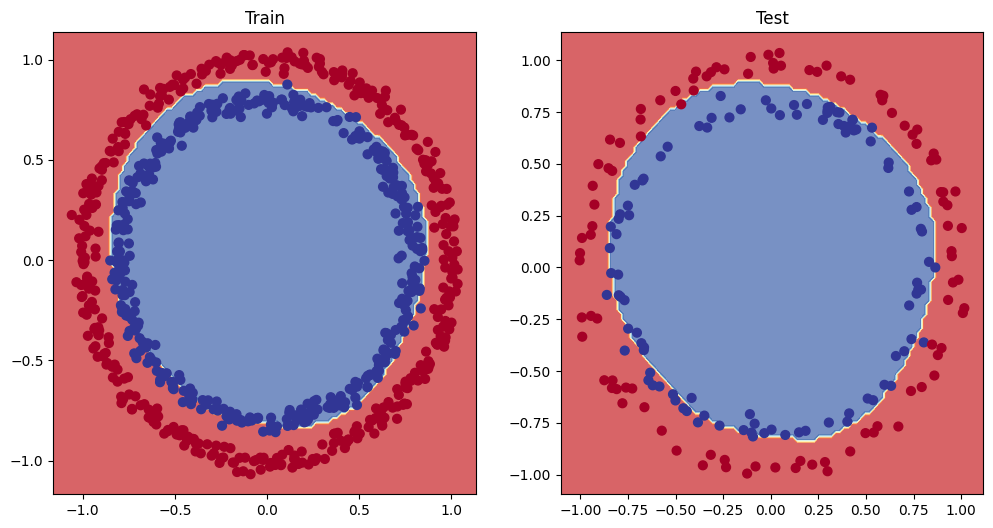

In [ ]:
# Plot decision boundary of our model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

In [ ]:
next(model_3.parameters()).is_cuda

False

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  preds = torch.round(torch.sigmoid(model_3(X_test.cpu()))).squeeze()
preds[:10].cpu(),y_test[:10].cpu()

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### putting it all together with a multiclass classification problem


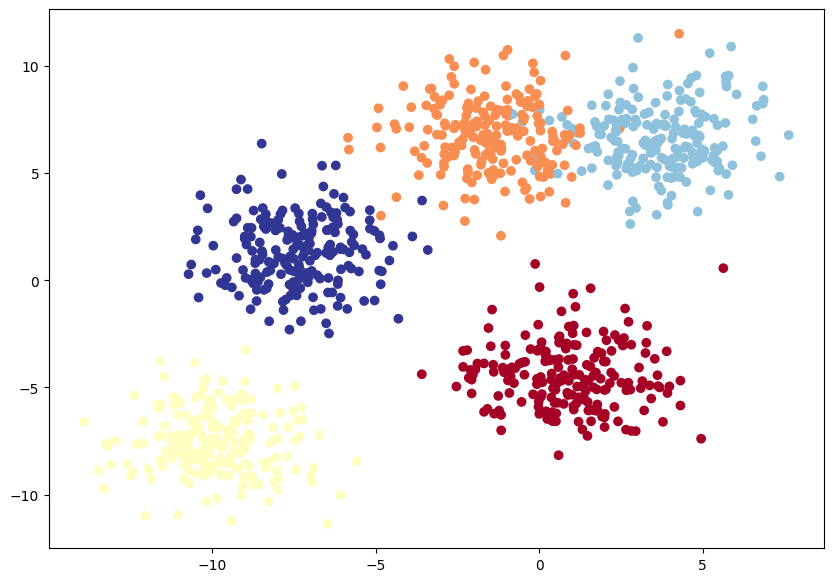

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyper parametrs for data creation
NUM_ClASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 100

# Create multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_ClASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### Building a multi-class classification model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multiclass classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_ClASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [ ]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.1831, -0.5017],
                      [ 0.5754, -0.4024],
                      [-0.2757,  0.2608],
                      [-0.7047,  0.4725],
                      [ 0.5171,  0.0578],
                      [-0.0641,  0.2778],
                      [-0.6406, -0.4573],
                      [ 0.4015,  0.2972]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.3351, -0.1962,  0.3856,  0.1589,  0.0919, -0.6362,  0.3183,  0.6147],
                     device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.2232,  0.0626,  0.1817,  0.0446,  0.2575, -0.3269,  0.1448, -0.1213],
                      [ 0.0577, -0.2424, -0.1379, -0.1682,  0.2769,  0.1728,  0.2049,  0.2227],
                      [ 0.2011,  0.1494,  0.3535,  0.3098, -0.0167, -0.3053,  0.2467,  0.0049],
                      [-0.0597,  0.2994,  0.0153, -0.1442,  0.1081,  0.1111,  0.1332, -0

### Create a loss function and an optimizer for our multi-class classification model

In [ ]:
# Create a loss function
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01)

### Getting prediction probabilities for a multiclass PyTorch model

**Lodits (raw output of the model) -> Pred probs (use `torch.softmax(dim=1) -> Pred labels (take the `argmax(dim=1)` of prediction probabilities**

In [ ]:
model_4.eval()
with torch.inference_mode():
  preds = model_4(X_blob_test.to(device))

preds

tensor([[ 1.2021e-01,  3.2757e-01, -1.9262e-02,  1.0762e-02,  6.4102e-01],
        [ 6.3842e-01,  6.8335e-01, -3.2112e-01,  1.2280e+00,  1.9330e+00],
        [ 3.4962e-01,  2.6237e-01, -1.8973e-01,  4.2028e-01,  9.9738e-01],
        [ 1.3976e+00,  8.0739e-01, -5.0167e-01,  1.2607e+00,  1.9189e+00],
        [ 1.8100e-01,  1.8182e-01, -1.4019e-01, -1.1905e-01,  8.4605e-01],
        [-2.7845e-01,  4.0600e-02, -4.9263e-01, -5.5558e-01,  1.5482e+00],
        [ 1.1628e+00,  6.9594e-01, -4.1530e-01,  1.0520e+00,  1.6528e+00],
        [ 3.0284e-01,  3.4008e-01, -1.2456e-01,  2.9573e-02,  9.6351e-01],
        [ 2.3513e-01,  4.3811e-01, -5.1025e-02,  1.1094e-01,  7.9241e-01],
        [ 8.9197e-01,  7.3231e-01, -3.8186e-01,  1.3894e+00,  2.0722e+00],
        [ 4.5976e-01,  4.7896e-01, -1.6875e-01,  1.5450e-01,  1.1859e+00],
        [-1.9810e-01,  6.4174e-02, -3.3654e-01, -4.3046e-01,  1.1750e+00],
        [ 5.8057e-01,  3.3515e-01, -2.8143e-01,  7.7376e-01,  1.3871e+00],
        [ 7.6958e-01,  7.

In [ ]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
print(input)
output = m(input)
print(output)

tensor([[-0.6607, -0.0555,  0.4671],
        [-1.1940, -0.5077, -2.0657]])
tensor([[0.1689, 0.3094, 0.5217],
        [0.2937, 0.5834, 0.1229]])


In [ ]:
m = nn.Softmax(dim=1)
output = m(preds)
output

tensor([[0.1761, 0.2166, 0.1531, 0.1578, 0.2964],
        [0.1269, 0.1327, 0.0486, 0.2288, 0.4630],
        [0.1823, 0.1671, 0.1063, 0.1957, 0.3485],
        [0.2347, 0.1301, 0.0351, 0.2047, 0.3953],
        [0.1848, 0.1849, 0.1340, 0.1369, 0.3593],
        [0.0985, 0.1355, 0.0795, 0.0746, 0.6119],
        [0.2293, 0.1438, 0.0473, 0.2053, 0.3743],
        [0.1856, 0.1927, 0.1211, 0.1412, 0.3594],
        [0.1784, 0.2186, 0.1340, 0.1576, 0.3115],
        [0.1422, 0.1212, 0.0398, 0.2339, 0.4629],
        [0.1867, 0.1903, 0.0996, 0.1376, 0.3859],
        [0.1264, 0.1643, 0.1101, 0.1002, 0.4990],
        [0.1767, 0.1383, 0.0746, 0.2144, 0.3959],
        [0.1238, 0.1208, 0.0394, 0.2320, 0.4839],
        [0.1889, 0.1350, 0.0769, 0.1894, 0.4098],
        [0.0839, 0.1169, 0.0638, 0.0610, 0.6744],
        [0.2198, 0.1648, 0.0652, 0.1986, 0.3516],
        [0.1553, 0.1664, 0.1150, 0.1116, 0.4517],
        [0.1501, 0.2033, 0.1436, 0.1918, 0.3112],
        [0.1837, 0.2127, 0.1100, 0.1525, 0.3411],


In [ ]:
torch.argmax(output, dim=1)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0')

### Creating a training and testing loop for our multiclass classification model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 2000

epoch_count = []
loss_values = []
test_loss_values = []

X_blob_train , y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test , y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  # 1. forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  # 2. Calculate loss
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():

    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # Print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.9592 | Acc: 19.25% | Test loss: 1.8805 | test Acc: 23.00%
Epoch: 10 | Loss: 1.7226 | Acc: 19.25% | Test loss: 1.6836 | test Acc: 23.00%
Epoch: 20 | Loss: 1.6040 | Acc: 19.25% | Test loss: 1.5761 | test Acc: 23.00%
Epoch: 30 | Loss: 1.5195 | Acc: 19.25% | Test loss: 1.4950 | test Acc: 23.00%
Epoch: 40 | Loss: 1.4453 | Acc: 21.50% | Test loss: 1.4234 | test Acc: 30.00%
Epoch: 50 | Loss: 1.3758 | Acc: 41.12% | Test loss: 1.3566 | test Acc: 46.00%
Epoch: 60 | Loss: 1.3099 | Acc: 48.12% | Test loss: 1.2936 | test Acc: 51.00%
Epoch: 70 | Loss: 1.2479 | Acc: 51.50% | Test loss: 1.2341 | test Acc: 55.50%
Epoch: 80 | Loss: 1.1900 | Acc: 53.25% | Test loss: 1.1774 | test Acc: 55.50%
Epoch: 90 | Loss: 1.1353 | Acc: 53.75% | Test loss: 1.1227 | test Acc: 56.00%
Epoch: 100 | Loss: 1.0829 | Acc: 63.75% | Test loss: 1.0691 | test Acc: 70.00%
Epoch: 110 | Loss: 1.0328 | Acc: 68.75% | Test loss: 1.0177 | test Acc: 73.50%
Epoch: 120 | Loss: 0.9839 | Acc: 70.12% | Test loss: 0.9672 | t

In [ ]:
Fhelp# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

#View the first 10 predictiions
y_logits[:10]

tensor([[ 0.7534,  4.9850, -2.8106,  2.9357,  0.5206],
        [ 2.8383, -8.1485, 14.7772, -1.0669,  6.7117],
        [ 8.1292, -4.1500, -0.8597,  0.0848, -3.3162],
        [-2.9454,  8.6519,  4.6071, -3.3701, 16.3657],
        [ 1.2489,  6.2632, -3.9906,  6.0110, -0.7306],
        [ 2.7479,  2.4146, -2.7929, 10.7778, -5.0227],
        [-2.5025,  7.0840,  3.9663, -2.8825, 13.6907],
        [ 0.8876,  9.2002, -5.1551,  5.5591,  1.3604],
        [ 0.5073,  7.3029, -3.7699,  2.7748,  2.0416],
        [ 0.9996, -6.9628, 16.2745, -2.1280,  9.8638]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.2577e-02, 8.6559e-01, 3.5622e-04, 1.1151e-01, 9.9650e-03],
        [6.5293e-06, 1.1050e-10, 9.9968e-01, 1.3148e-07, 3.1409e-04],
        [9.9954e-01, 4.6453e-06, 1.2474e-04, 3.2077e-04, 1.0694e-05],
        [4.1027e-09, 4.4641e-04, 7.8177e-06, 2.6830e-09, 9.9955e-01],
        [3.7218e-03, 5.6032e-01, 1.9738e-05, 4.3543e-01, 5.1415e-04],
        [3.2542e-04, 2.3317e-04, 1.2766e-06, 9.9944e-01, 1.3731e-07],
        [9.2639e-08, 1.3494e-03, 5.9724e-05, 6.3349e-08, 9.9859e-01],
        [2.3899e-04, 9.7384e-01, 5.6764e-07, 2.5538e-02, 3.8344e-04],
        [1.0999e-03, 9.8317e-01, 1.5267e-05, 1.0619e-02, 5.1011e-03],
        [2.3201e-07, 8.0808e-11, 9.9836e-01, 1.0167e-08, 1.6411e-03]],
       device='cuda:0')

In [ ]:
y_pred_probs.argmax(dim=1)

tensor([1, 2, 0, 4, 1, 3, 4, 1, 1, 2, 1, 3, 0, 2, 0, 3, 4, 3, 0, 1, 4, 3, 1, 0,
        3, 2, 0, 1, 0, 0, 1, 4, 1, 0, 1, 2, 2, 0, 2, 4, 4, 0, 3, 2, 3, 2, 0, 4,
        3, 2, 4, 2, 1, 0, 0, 2, 3, 3, 1, 0, 2, 0, 3, 4, 0, 3, 3, 3, 1, 0, 0, 1,
        3, 3, 4, 4, 2, 4, 4, 1, 4, 0, 2, 3, 4, 2, 3, 1, 0, 3, 1, 4, 3, 2, 0, 1,
        0, 0, 4, 4, 0, 0, 2, 3, 1, 4, 3, 4, 4, 0, 4, 0, 3, 3, 2, 2, 3, 4, 0, 4,
        4, 1, 4, 0, 1, 1, 2, 2, 0, 4, 3, 3, 0, 0, 4, 2, 2, 4, 4, 2, 3, 4, 4, 1,
        0, 1, 0, 1, 4, 3, 4, 1, 4, 4, 4, 1, 1, 1, 1, 0, 3, 3, 3, 4, 4, 1, 4, 2,
        0, 2, 2, 2, 3, 3, 3, 1, 4, 3, 0, 0, 4, 2, 3, 2, 4, 3, 1, 3, 2, 1, 2, 3,
        0, 2, 3, 2, 4, 0, 3, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 2, 0, 4, 1, 3, 4, 1, 1, 2, 1, 3, 0, 2, 0, 3, 4, 3, 0, 1, 4, 3, 1, 0,
        3, 2, 0, 1, 0, 0, 1, 4, 1, 0, 1, 2, 2, 0, 2, 4, 4, 0, 3, 2, 3, 2, 0, 4,
        3, 2, 4, 2, 1, 0, 0, 2, 3, 3, 1, 0, 2, 0, 3, 4, 0, 3, 1, 3, 1, 0, 0, 1,
        3, 3, 4, 4, 2, 4, 4, 1, 4, 0, 2, 3, 4, 2, 3, 1, 0, 3, 3, 4, 3, 2, 0, 1,
        0, 0, 4, 4, 0, 0, 2, 3, 1, 4, 3, 4, 4, 0, 4, 0, 3, 3, 2, 2, 3, 4, 0, 4,
        4, 1, 4, 0, 1, 1, 2, 2, 0, 4, 3, 3, 0, 0, 4, 2, 2, 4, 4, 2, 3, 4, 4, 1,
        0, 1, 0, 1, 4, 3, 4, 1, 4, 4, 4, 1, 1, 4, 1, 0, 3, 3, 3, 4, 4, 1, 4, 2,
        0, 2, 2, 2, 1, 3, 3, 1, 4, 3, 0, 0, 4, 2, 3, 2, 4, 3, 1, 1, 2, 3, 2, 3,
        0, 2, 3, 2, 4, 0, 3, 1], device='cuda:0')

NameError: ignored

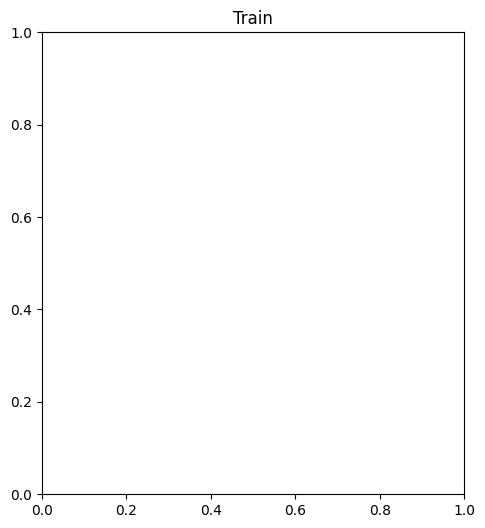

In [ ]:
# Plot decision boundary of our model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [ ]:
import numpy as np

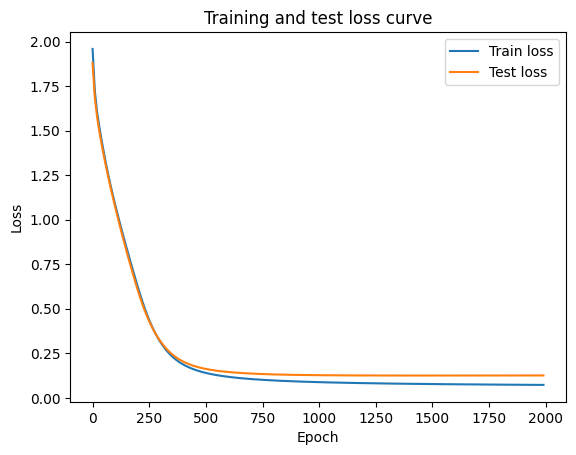

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).to("cpu").numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).to("cpu").numpy()), label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

### A Few more classification metrics (evaluation)  

* Acuuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

**https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html**

In [ ]:
! pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass", num_classes=5).to(device)

accuracy(y_pred_probs.argmax(dim=1),y_blob_test)

tensor(0.9700, device='cuda:0')